<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/Scenario_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dependencies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import seaborn as sborn
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings("ignore", category=ValueWarning)

## Loading and Shaping the Dataset

In [62]:
Spins_DF = pd.read_csv('/content/Scenario IV.csv')
Spins_DF

,OPERATOR,CASINONAME,Spins
0,operator01,Casino01 - V,2447248
1,operator02,City,2355583
2,operator01,Casino01 - JUK,1950172
3,operator03,NuevoG - Casino03.gr,1064791
4,operator02,Jose City Mobile - HTML 5,900494
...,...,...,...
94,operator06,b - Rizk.se,1276
95,operator06,b - SharkMAL.com,1200
96,operator02,Clubneil CAN Viper,1059
97,operator02,Royal (Malta),742


## Data Augumentation thru Manual Condition Check

In [63]:
#Calculating Magnitude to Viz later
Spins_DF['Magnitute_of_Spins'] = np.floor(np.log10(Spins_DF['Spins']))
#Checking if CasinoName has Website
Spins_DF['WebBasedGame'] = Spins_DF['CASINONAME'].str.contains('\.')
#Checking if CasinoName has HTML
Spins_DF['HTMLBasedGame'] = Spins_DF['CASINONAME'].str.contains('HTML 5|HTML5|HTML-5|html', case=False)
#Checking if CasinoName has Flash
Spins_DF['FlashBasedGame'] = Spins_DF['CASINONAME'].str.contains('flash', case=False)

# Converting 3 boolean columns into 1 categorical column
def check_type(row):
    if row['WebBasedGame']:
        return 'WebBasedGame'
    elif row['HTMLBasedGame']:
        return 'HTMLBasedGame'
    elif row['FlashBasedGame']:
        return 'FlashBasedGame'
    else:
        return 'Other'

Spins_DF['Type'] = Spins_DF.apply(check_type, axis=1)
Spins_DF.drop(['WebBasedGame', 'HTMLBasedGame', 'FlashBasedGame'], axis=1, inplace=True)
Spins_DF

,OPERATOR,CASINONAME,Spins,Magnitute_of_Spins,Type
0,operator01,Casino01 - V,2447248,6.0,Other
1,operator02,City,2355583,6.0,Other
2,operator01,Casino01 - JUK,1950172,6.0,Other
3,operator03,NuevoG - Casino03.gr,1064791,6.0,WebBasedGame
4,operator02,Jose City Mobile - HTML 5,900494,5.0,HTMLBasedGame
...,...,...,...,...,...
94,operator06,b - Rizk.se,1276,3.0,WebBasedGame
95,operator06,b - SharkMAL.com,1200,3.0,WebBasedGame
96,operator02,Clubneil CAN Viper,1059,3.0,Other
97,operator02,Royal (Malta),742,2.0,Other


In [64]:
Spins_DF.describe()

,Spins,Magnitute_of_Spins
count,9.900000e+01,99.000000
mean,2.202827e+05,4.101010
std,4.370982e+05,0.874759
min,6.760000e+02,2.000000
25%,9.404500e+03,3.500000
50%,4.210800e+04,4.000000
75%,1.978025e+05,5.000000
max,2.447248e+06,6.000000


## Vizualization

**Conclusions**


1.   Operator01 and Operator02 has significantly more spins than any other operator
2.   WebBasedGames(Games with website in it's name) has significantly more spins than FlashBasedGames(Games with Flash in it's name)



#### 1. Bar Chart

##### Exhibit A -- Spins per Operator

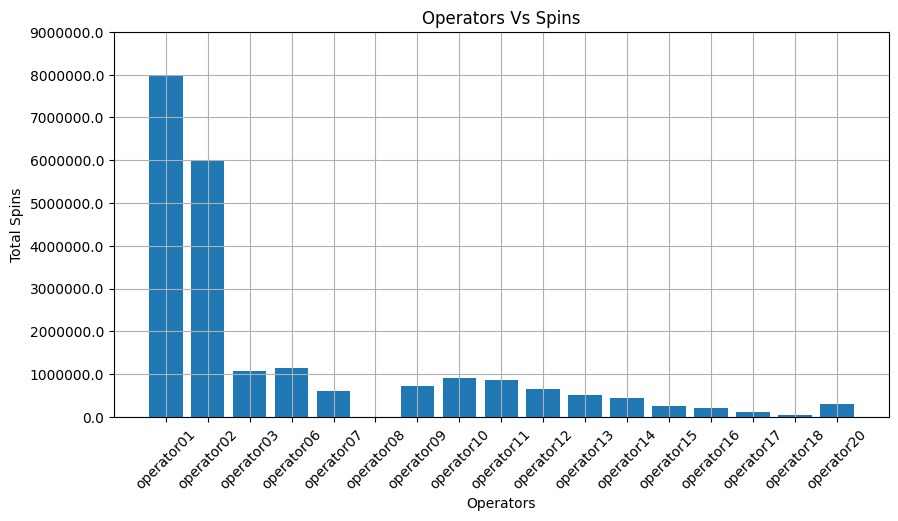

In [65]:
# Grouping the Spins by Operator Category
operator_group = Spins_DF.groupby('OPERATOR')['Spins'].sum().reset_index()

# Plotting the chart
pyplt.figure(figsize=(10, 5))
pyplt.bar(operator_group['OPERATOR'], operator_group['Spins'])

# Adding Chart's Description for interpretation
pyplt.xlabel('Operators')
pyplt.ylabel('Total Spins')
pyplt.title('Operators Vs Spins')

#Displaying the chart

# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

pyplt.grid(True)
pyplt.xticks(rotation=45)
pyplt.show()

##### Exhibit B -- Spins vs Type

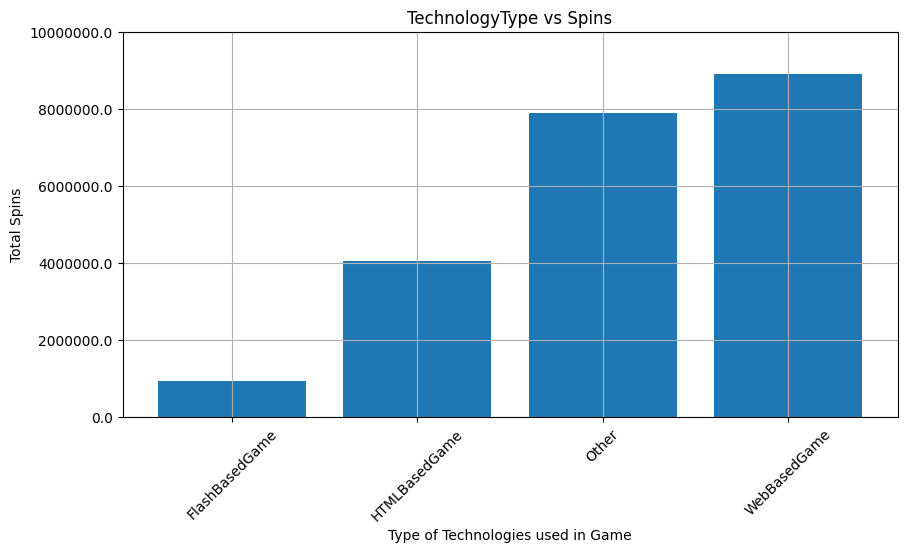

In [66]:
# Grouping the Spins by Type Category
Type_group = Spins_DF.groupby('Type')['Spins'].sum().reset_index()

# Plotting the chart
pyplt.figure(figsize=(10, 5))
pyplt.bar(Type_group['Type'], Type_group['Spins'])

# Adding Chart's Description for interpretation
pyplt.xlabel('Type of Technologies used in Game')
pyplt.ylabel('Total Spins')
pyplt.title('TechnologyType vs Spins')

#Displaying the chart

# Retrieveing Current y lables [since yticks are mutlidimentional, i am only retrieving quantity values from y]
labels_content, remaining_args = pyplt.yticks()
# Making sure current y lables are not truncated
pyplt.yticks(labels_content, labels=labels_content)

pyplt.grid(True)
pyplt.xticks(rotation=45)
pyplt.show()

#### 2. Horizontal Bar Chart -- Leaderboard and Loserboard

##### Exhibit A - Leaderboard

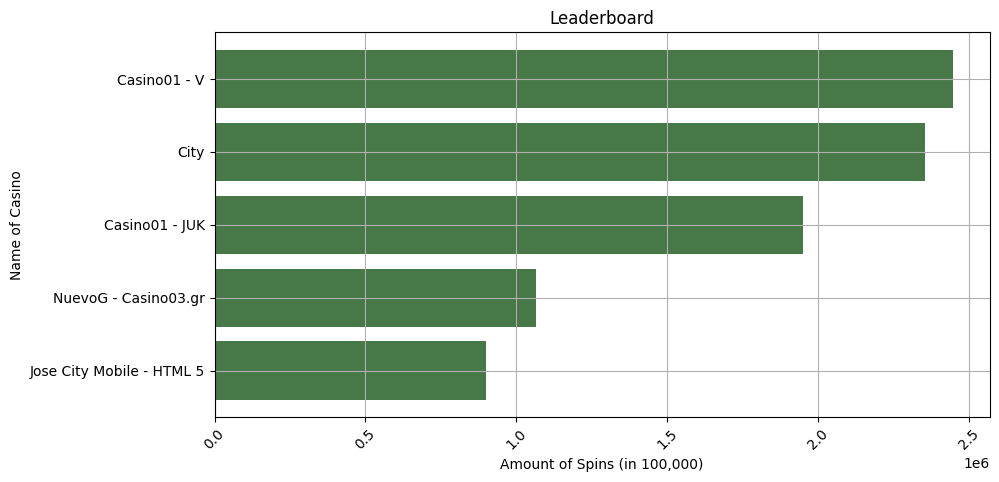

In [67]:
# Sorting Spin Count
Spins_DF = Spins_DF.sort_values(by='Spins', ascending=True) #ascending so that i can pick tail

# Choosing Top 5 Casinos to declare on leaderboard
leaderboard = Spins_DF.tail(5) #picking tail cause it is sorted in ascending

# Plotting a Chart
pyplt.figure(figsize=(10, 5))
pyplt.barh(leaderboard['CASINONAME'], leaderboard['Spins'], color='#487748')

# Describing the Chart
pyplt.xlabel('Amount of Spins (in 100,000)')
pyplt.ylabel('Name of Casino')
pyplt.title('Leaderboard')

# Displaying the chart
pyplt.xticks(rotation=45)
pyplt.grid(True)
pyplt.show()

##### Exhibit B - Looserboard

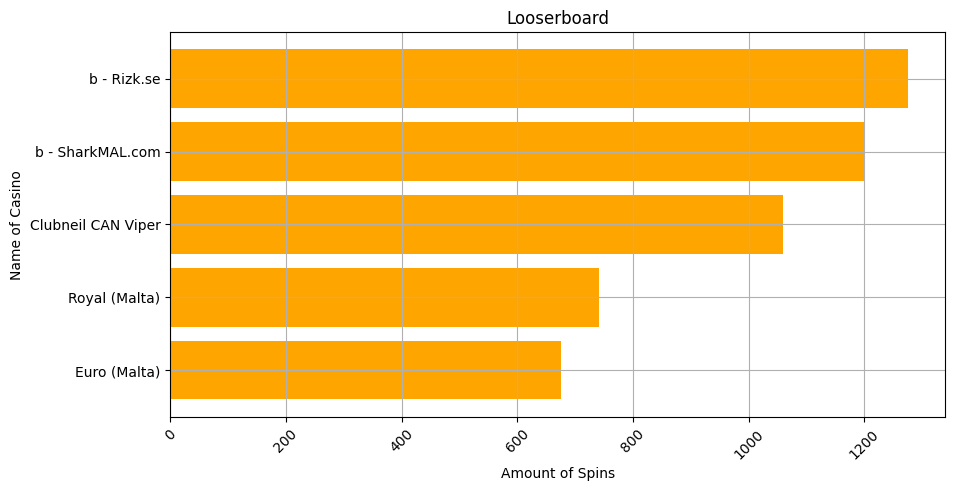

In [68]:
# Sorting Spin Count
Spins_DF = Spins_DF.sort_values(by='Spins', ascending=True)

# Choosing Top 5 Casinos to declare on leaderboard
Looserboard = Spins_DF.head(5)

# Plotting a Chart
pyplt.figure(figsize=(10, 5))
pyplt.barh(Looserboard['CASINONAME'], Looserboard['Spins'], color='orange')

# Describing the Chart
pyplt.xlabel('Amount of Spins')
pyplt.ylabel('Name of Casino')
pyplt.title('Looserboard')

# Displaying the chart
pyplt.xticks(rotation=45)
pyplt.grid(True)
pyplt.show()

#### 3. Pie Charts -- Game Types MarketShare

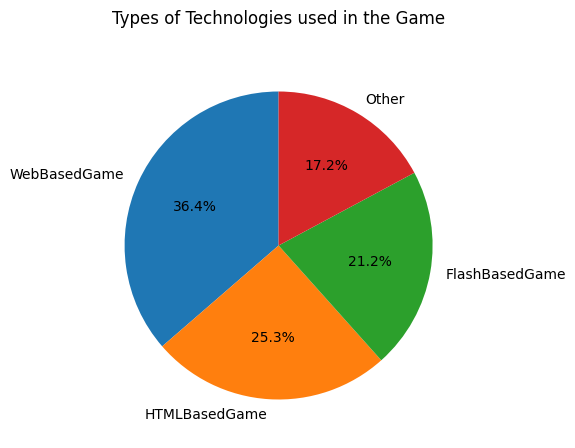

In [69]:
# Computing occurence of each Type of Game
type_total = Spins_DF['Type'].value_counts()

# Constructing a Pie Chart
pyplt.figure(figsize=(10, 5))
pyplt.pie(type_total, labels=type_total.index, autopct='%1.1f%%', startangle=90)

# Adding Descriptions
pyplt.title('Types of Technologies used in the Game\n')

# Show the pie chart
pyplt.show()